Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

1. Customers who left within the last month – the column is called Churn
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download

In this exploratory data analysis, we will try to understand the "Customer Churn" data. Where customer churn is the reduction in the number of customers in a company in a certain period, and this can affect the sustainability of the business and the profits generated by a company.

In [113]:
#import Linrary
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

In [2]:
#Mounting Data From Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load Dataset
df = pd.read_csv('/content/drive/MyDrive/DS Dibimbing Batch 15/D-14/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
#Data Preview
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Data Cleansing
   - Missing Values
   - Duplicated Values 

In [5]:
#Use 10 sample data to recognize data
df.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5412,3733-UOCWF,Male,1,Yes,No,61,Yes,Yes,Fiber optic,No,...,No,Yes,No,No,One year,Yes,Bank transfer (automatic),85.55,5251.75,No
4571,0599-XNYDO,Female,0,Yes,No,20,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),69.80,1540.35,No
313,2799-ARNLO,Female,1,Yes,No,5,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.35,341.6,No
5653,7638-QVMVY,Female,0,No,No,7,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.00,522.95,Yes
5385,0843-WTBXE,Male,0,No,No,53,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),85.45,4517.25,Yes
6242,8265-HKSOW,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),107.45,7658.3,No
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
1195,4468-KAZHE,Female,1,Yes,No,20,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,60.00,1259.35,No
4547,5339-TJFEK,Male,0,Yes,Yes,62,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,6487.2,No
6833,9129-UXERG,Female,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),103.60,1806.35,No


In [6]:
#Data Infromation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Observation:
- From the table sample of 10 data we know that tenure, MonthlyCharges, and TotalCharges columns are numeric.
- SeniorCitizen is apparently a binary (0,1)
- The Other columns are object (string) data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
- If we compare the sample table and the info table, we can conclude that the feature total charges which should be numeric (float(64)) but in the information table are still objects (inappropriate).

In [7]:
# Drop rows that contain whitespace from totalcharges feature
df = df.loc[~df['TotalCharges'].str.contains(' ')]

In [8]:
#Transform Coloumn TotalCharges type to Numeric (Float64)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [9]:
#Recheck Information of the "Customer Churn" Data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Observation
- The data is correct now, the type of total chargehas changed to numeric float64
- After dropping data on rows containing whitespace on TotalCharge now the data has changed from 7043 rows to 7032 rows


In [10]:
#Percentage of Missing Values in Each Column
df.isna().sum() * 100 / len(df)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

Observation:

Based on the results of the calculation of the percentage of the number of missing values ​​obtained a value of 0.0%, so it can be concluded that there is no missing value in the 21 existing columns

In [11]:
#Duplicated Values
df.duplicated().sum()

0

Observation:

No duplicate data found in Customer Churn raw data

In [12]:
#Separate Column Into Numerical and Categorical
all_columns = df.columns.to_list()
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical = list(set(all_columns) - set(numerical))

In [13]:
# check for odd values in categorical columns, such as string "-", or other
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64 

PaperlessBilling
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64 

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64 

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64 

PaymentMethod
Electronic check             2365
Mailed 

Observation:

- There is no odd value on table
- For some columns, there are 'No internet service' and 'No phone service'. For analysis further and make modelling, they can be changed to 'No' because both of them are same with 'No'

# 2. Exploratory Data Analysis

- Statistical summary of columns
- Univariate analysis
- Multivariate analysis

In [14]:
cats = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
        'PaymentMethod', 'Churn']
numbs = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [15]:
#Numeric Columns
df[numbs].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observation:

- Minimum and Maximum value seem reasonable.
- SeniorCitizen and TotalCharges have a mean value greater than 50% compared to the median value (Q2). It can be distributed in the elderly data and the total charge is not normal or not symmetrical.

In [16]:
#Categorical Column
df[cats].describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [17]:
for i in df[categorical].columns:
    x = df[categorical][i].value_counts()
    print(i)
    print(x,'\n')

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64 

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64 

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64 

PaperlessBilling
Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64 

StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64 

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64 

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64 

TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64 

StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64 

PaymentMethod
Electronic check             2365
Mailed 

# Univariate Analysis

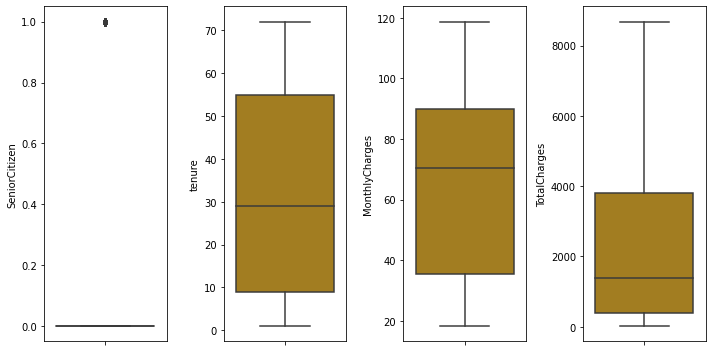

In [18]:
#Detect Ouliers via Boxplot
features = numbs
plt.figure(figsize=(10,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='darkgoldenrod')
  plt.tight_layout()

Observation:

There's no outlier on all variable that have type numeric

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

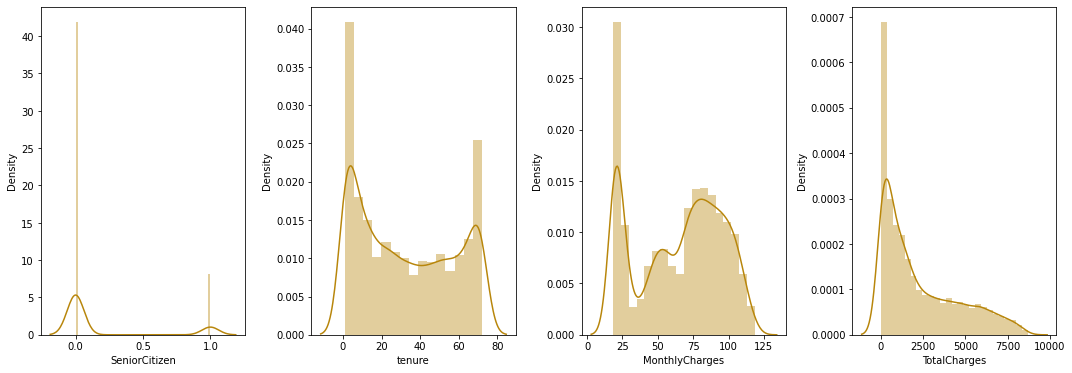

In [19]:
#Inspect Column Distribution
plt.figure(figsize=(15,10))
for i in range(0, len(features)):
  plt.subplot(2, 4, i+1)
  sns.distplot(x=df[features[i]], color='darkgoldenrod')
  plt.xlabel(features[i])
  plt.tight_layout()

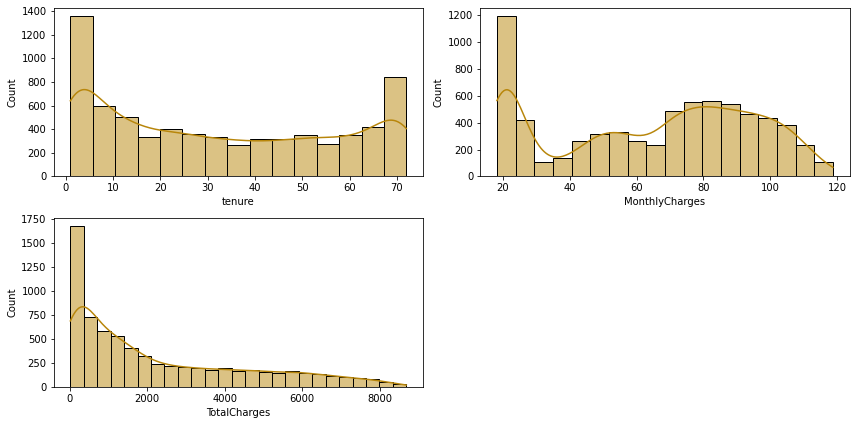

In [20]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.histplot(x=df[features[i]], color='darkgoldenrod', kde=True)
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

After adjusting/transforming the data, the distribution of the three numerical variables looks closer to normal

In [21]:
# check distribution peak for every column in numerical
for i in df[numerical].columns:
    x = df[numerical][i].mode()
    print(i)
    print(x,'\n')

tenure
0    1
dtype: int64 

MonthlyCharges
0    20.05
dtype: float64 

TotalCharges
0    20.2
dtype: float64 



Observation:

- Most customer has distribution peak Tenure = 1 month, MonthlyCharges ~ 20, TotalCharges ~ 20.
- Tenure column has U-shape distribution, MonthlyCharges column has bimodal distribution, TotalCharges column has J-shape distribution.
- The highest number of customers have a short term tenure. And also a high number of customers has a long term tenure.

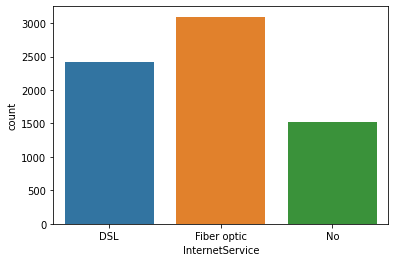

In [22]:
#Countplot for Categorical Columns
sns.countplot(data=df, x='InternetService')

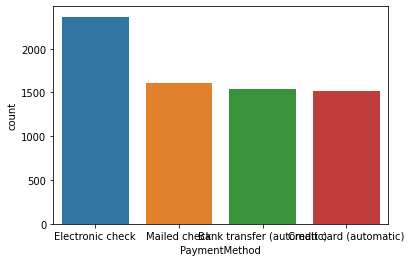

In [23]:
sns.countplot(data=df, x='PaymentMethod')

Observation:

on the internet services and payment method variables mostly customers choose Fiber Optic Service and electronic check

# Multivariate Analysis

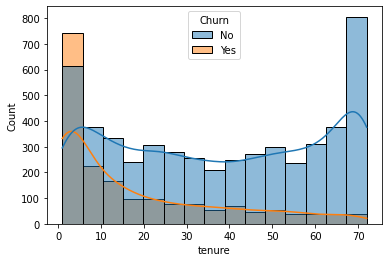

In [24]:
sns.histplot(data=df,
            x='tenure',
            hue='Churn', alpha=0.5, kde=True)

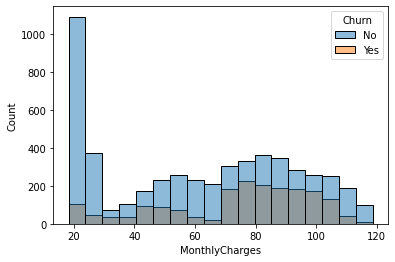

In [25]:
sns.histplot(data=df,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

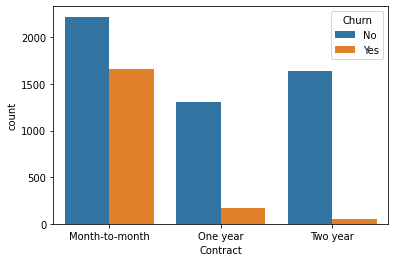

In [26]:
sns.countplot(data = df, 
              x = 'Contract', 
              hue = 'Churn')
plt.show()

Observation:

- The churn rate decreases as the tenure increase. Good maintain for long time customer.
- Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
- Most churn customers purchased a short term month-to-month contract.

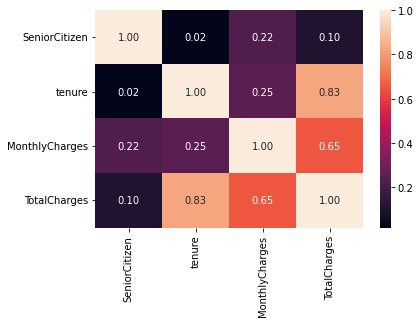

In [27]:
# correlation heatmap df
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Observation
- Tenure and TotalCharges are highly correlated each other
- Low correlation for other columns

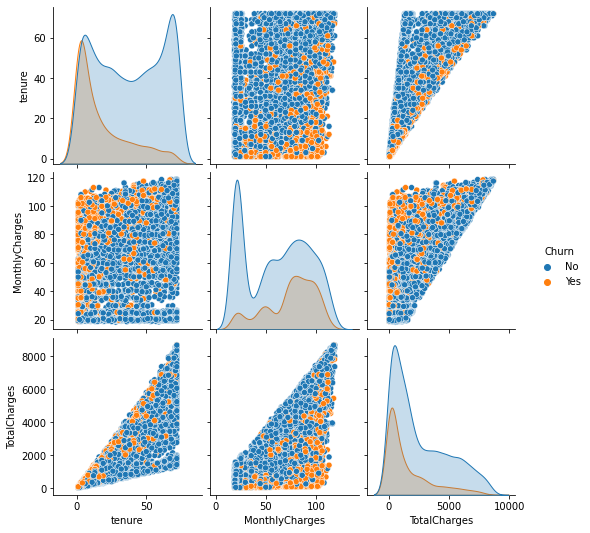

In [28]:
sns.pairplot(df,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

Observation:

- The churn rate decreases as the tenure increase. Good maintain for long time customer
- Higher monthly charges tend to have higher churn percentage

# Conclusion

- The data does not contain major issues. No NULL values, no duplicated rows and no odd values. We drop null values due to small in proportion (< 5%) and Churn = No.
- Overall, the minimum and maximum values make sense for each column.
- Most columns appear to be object/nominal data that has contain 2 or more than 2 values (Female/Male, Yes/No/other, others).
- TotalCharges dtypes is inappropriate. It has been changed to float64.
- All of the columns with continuous numerical values are not symmetric.
Most of the customers has a phone service (90%).
73% of the customers is not churn.
- From histogram plot of Tenure and Churn column, we can say that the churn rate decreases as the tenure increase. Good maintain for long time customer.
- Churn rate among customers use very cheap plans in monthly charges is low. And churn rate among high spender customer is high (70 - 100 USD).
Most churn customers purchased a short term month-to-month contract.
- Tenure and contract duration seems to be strong factors for churn
- From correlation heatmap: We can see that Tenure and TotalCharges are highly correlated each other.
- From pairplot: We can see that higher monthly charges tend to have higher churn percentage

# Perform deep-dive exploration
- Ask minimum 2 questions
  1. Which service contributes the most revenue?
  2. Who are Telco's majority customers?
  3. Customer Loyalty
- At least 1 of them should involve group-by aggregation!

In [29]:
gender_customer = (df
                .groupby(['gender','customerID'])
                .agg(total_spend=('MonthlyCharges','sum'))
                .reset_index())
gender_customer.head()

,gender,customerID,total_spend
0,Female,0002-ORFBO,65.6
1,Female,0013-EXCHZ,83.9
2,Female,0013-MHZWF,69.4
3,Female,0013-SMEOE,109.7
4,Female,0015-UOCOJ,48.2


In [30]:
#Revenue based on gender
(df.groupby(['gender'])
  .agg(total_charge = ('TotalCharges','sum')))

,total_charge
gender,
Female,7952354.2
Male,8103814.5


In [31]:
(df.groupby(['SeniorCitizen'])
  .agg(average_charge = ('TotalCharges','mean')))

,average_charge
SeniorCitizen,
0,2181.089550
1,2810.465193


In [32]:
(df.groupby(['SeniorCitizen'])
  .agg(Total_charge = ('TotalCharges','sum')))

,Total_charge
SeniorCitizen,
0,12846617.45
1,3209551.25


In [33]:
(df.groupby(['SeniorCitizen'])
  .agg(total_count = ('InternetService','count')))

,total_count
SeniorCitizen,
0,5890
1,1142


In [34]:
(df.groupby(['InternetService'])
  .agg(Total_Charge = ('TotalCharges','sum')))

,Total_Charge
InternetService,
DSL,5121410.85
Fiber optic,9923622.95
No,1011134.90


In [35]:
(df.groupby(['InternetService'])
  .agg(avg_charge = ('TotalCharges','mean')))

,avg_charge
InternetService,
DSL,2119.789259
Fiber optic,3205.304570
No,665.220329


In [36]:
(df.groupby(['InternetService'])
  .agg(Total_Charge = ('TotalCharges','sum')))

,Total_Charge
InternetService,
DSL,5121410.85
Fiber optic,9923622.95
No,1011134.90


# Conclusion:

- The average revenue contribution from seniors is actually much higher than that of non-seniors, although in total the revenue contribution from non-seniors is still the largest
- Most telco customers are non-senior people.
- The most widely used Internet service is Fiber Optic
- Fiber optic is an internet service that contributes the most to the company's revenue.
- Customer Loyal in categorize : Female	0013-SMEOE	with total spend109.7

#3. DATA PREPROCESSING

Data Information

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [38]:
df.drop(["customerID"],axis=1,inplace = True)

In [39]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [40]:
df.gender = [1 if each == "Male" else 0 for each in df.gender]

In [41]:
columns_to_convert = [ 'Partner','Dependents',                  
                      'PhoneService', 
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling', 
                      'Churn']

for item in columns_to_convert:
    df[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df[item]]
    
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


#Copy Data & Frequency Encoding : Feature Engineering

In [42]:
data_telco = df.copy()

In [43]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,-1,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,-1,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,-1,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [44]:
df = df.copy()

#Dependents

In [45]:
freq_et = df['Dependents'].value_counts().reset_index()
freq_et

,index,Dependents
0,0,4933
1,1,2099


In [46]:
freq_et.rename(columns={"index": "Dependents", "Dependents": "freq_Dependents"}, inplace = True)
freq_et

,Dependents,freq_Dependents
0,0,4933
1,1,2099


In [47]:
freq_et['percentage_Dependents'] = round((freq_et['freq_Dependents']/freq_et['freq_Dependents'].sum())*100,2)
freq_et

,Dependents,freq_Dependents,percentage_Dependents
0,0,4933,70.15
1,1,2099,29.85


In [48]:
df = df.merge(freq_et[['Dependents','percentage_Dependents']], on='Dependents', how='inner')

In [49]:
df[['Dependents','percentage_Dependents']]

,Dependents,percentage_Dependents
0,0,70.15
1,0,70.15
2,0,70.15
3,0,70.15
4,0,70.15
...,...,...
7027,1,29.85
7028,1,29.85
7029,1,29.85
7030,1,29.85


In [50]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15
1,1,0,0,0,34,1,0,DSL,1,0,...,0,0,0,One year,0,Mailed check,56.95,1889.50,0,70.15
2,1,0,0,0,2,1,0,DSL,1,1,...,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,70.15
3,1,0,0,0,45,0,-1,DSL,1,0,...,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,70.15
4,0,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,70.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,1,1,0,Fiber optic,0,0,...,0,0,0,Month-to-month,1,Mailed check,70.65,70.65,1,29.85
7028,1,0,1,1,12,1,0,No,-1,-1,...,-1,-1,-1,Month-to-month,1,Electronic check,19.20,239.00,0,29.85
7029,1,0,1,1,24,1,1,DSL,1,0,...,1,1,1,One year,1,Mailed check,84.80,1990.50,0,29.85
7030,0,0,1,1,72,1,1,Fiber optic,0,1,...,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,29.85


#Partner

In [51]:
freq_et = df['Partner'].value_counts().reset_index()
freq_et.rename(columns={"index": "Partner", "Partner": "freq_Partner"}, inplace = True)
freq_et['percentage_Partner'] = round((freq_et['freq_Partner']/freq_et['freq_Partner'].sum())*100,2)
freq_et

,Partner,freq_Partner,percentage_Partner
0,0,3639,51.75
1,1,3393,48.25


In [52]:
df = df.merge(freq_et[['Partner','percentage_Partner']], on='Partner', how='inner')
df[['Partner','percentage_Partner']]

,Partner,percentage_Partner
0,1,48.25
1,1,48.25
2,1,48.25
3,1,48.25
4,1,48.25
...,...,...
7027,0,51.75
7028,0,51.75
7029,0,51.75
7030,0,51.75


In [53]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25
1,0,0,1,0,28,1,1,Fiber optic,0,0,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1,70.15,48.25
2,1,0,1,0,58,1,1,Fiber optic,0,0,...,1,1,One year,0,Credit card (automatic),100.35,5681.10,0,70.15,48.25
3,1,0,1,0,12,1,0,No,-1,-1,...,-1,-1,One year,0,Bank transfer (automatic),19.80,202.25,0,70.15,48.25
4,0,0,1,0,58,1,1,DSL,0,1,...,0,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,48,0,-1,DSL,0,1,...,0,1,Month-to-month,0,Credit card (automatic),45.55,2108.35,0,29.85,51.75
7028,1,0,0,1,50,0,-1,DSL,1,1,...,1,0,One year,1,Bank transfer (automatic),43.05,2208.05,0,29.85,51.75
7029,1,0,0,1,1,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Mailed check,24.20,24.20,0,29.85,51.75
7030,1,0,0,1,31,0,-1,DSL,0,0,...,0,0,Month-to-month,0,Credit card (automatic),25.00,789.20,0,29.85,51.75


#InternetServices

In [54]:
freq_et = df['InternetService'].value_counts().reset_index()
freq_et.rename(columns={"index": "InternetService", "InternetService": "freq_Internet_service"}, inplace = True)
freq_et['percentage_internet_service'] = round((freq_et['freq_Internet_service']/freq_et['freq_Internet_service'].sum())*100,2)
freq_et

,InternetService,freq_Internet_service,percentage_internet_service
0,Fiber optic,3096,44.03
1,DSL,2416,34.36
2,No,1520,21.62


In [55]:
df = df.merge(freq_et[['InternetService','percentage_internet_service']], on='InternetService', how='inner')
df[['InternetService','percentage_internet_service']]

,InternetService,percentage_internet_service
0,DSL,34.36
1,DSL,34.36
2,DSL,34.36
3,DSL,34.36
4,DSL,34.36
...,...,...
7027,No,21.62
7028,No,21.62
7029,No,21.62
7030,No,21.62


In [56]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36
1,0,0,1,0,58,1,1,DSL,0,1,...,0,Two year,1,Credit card (automatic),59.90,3505.10,0,70.15,48.25,34.36
2,1,0,1,0,72,1,1,DSL,1,1,...,1,Two year,1,Credit card (automatic),90.25,6369.45,0,70.15,48.25,34.36
3,0,0,1,0,13,1,1,DSL,1,1,...,0,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36
4,0,1,1,0,25,1,1,DSL,1,0,...,0,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,25,1,0,No,-1,-1,...,-1,Month-to-month,0,Mailed check,20.80,460.20,0,29.85,51.75,21.62
7028,1,0,0,1,1,1,0,No,-1,-1,...,-1,Month-to-month,1,Mailed check,19.30,19.30,0,29.85,51.75,21.62
7029,1,0,0,1,44,1,0,No,-1,-1,...,-1,Two year,0,Bank transfer (automatic),19.55,819.95,0,29.85,51.75,21.62
7030,1,0,0,1,27,1,0,No,-1,-1,...,-1,Two year,0,Credit card (automatic),19.70,509.30,0,29.85,51.75,21.62


#Contract

In [57]:
freq_et = df['Contract'].value_counts().reset_index()
freq_et.rename(columns={"index": "Contract", "Contract": "freq_Contract"}, inplace = True)
freq_et['percentage_Contract'] = round((freq_et['freq_Contract']/freq_et['freq_Contract'].sum())*100,2)
freq_et

,Contract,freq_Contract,percentage_Contract
0,Month-to-month,3875,55.11
1,Two year,1685,23.96
2,One year,1472,20.93


In [58]:
df = df.merge(freq_et[['Contract','percentage_Contract']], on='Contract', how='inner')
df[['Contract','percentage_Contract']]

,Contract,percentage_Contract
0,Month-to-month,55.11
1,Month-to-month,55.11
2,Month-to-month,55.11
3,Month-to-month,55.11
4,Month-to-month,55.11
...,...,...
7027,One year,20.93
7028,One year,20.93
7029,One year,20.93
7030,One year,20.93


In [59]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract
0,0,0,1,0,1,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11
1,0,0,1,0,13,1,1,DSL,1,1,...,Month-to-month,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11
2,0,1,1,0,25,1,1,DSL,1,0,...,Month-to-month,1,Credit card (automatic),69.50,1752.65,0,70.15,48.25,34.36,55.11
3,1,0,1,0,29,0,-1,DSL,0,0,...,Month-to-month,0,Mailed check,33.75,1009.25,0,70.15,48.25,34.36,55.11
4,1,1,1,0,58,0,-1,DSL,0,1,...,Month-to-month,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,39,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93
7028,1,0,0,1,30,1,1,No,-1,-1,...,One year,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93
7029,1,0,0,1,52,1,0,No,-1,-1,...,One year,0,Credit card (automatic),19.65,928.40,0,29.85,51.75,21.62,20.93
7030,0,0,0,1,2,1,0,No,-1,-1,...,One year,0,Bank transfer (automatic),20.50,38.25,0,29.85,51.75,21.62,20.93


#Payment Method

In [60]:
freq_et = df['PaymentMethod'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaymentMethod", "PaymentMethod": "freq_PaymentMethod"}, inplace = True)
freq_et['percentage_PaymentMethod'] = round((freq_et['freq_PaymentMethod']/freq_et['freq_PaymentMethod'].sum())*100,2)
freq_et

,PaymentMethod,freq_PaymentMethod,percentage_PaymentMethod
0,Electronic check,2365,33.63
1,Mailed check,1604,22.81
2,Bank transfer (automatic),1542,21.93
3,Credit card (automatic),1521,21.63


In [61]:
df = df.merge(freq_et[['PaymentMethod','percentage_PaymentMethod']], on='PaymentMethod', how='inner')
df[['PaymentMethod','percentage_PaymentMethod']]

,PaymentMethod,percentage_PaymentMethod
0,Electronic check,33.63
1,Electronic check,33.63
2,Electronic check,33.63
3,Electronic check,33.63
4,Electronic check,33.63
...,...,...
7027,Bank transfer (automatic),21.93
7028,Bank transfer (automatic),21.93
7029,Bank transfer (automatic),21.93
7030,Bank transfer (automatic),21.93


In [62]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod
0,0,0,1,0,1,0,-1,DSL,0,1,...,1,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63
1,0,0,1,0,13,1,1,DSL,1,1,...,1,Electronic check,76.20,981.45,0,70.15,48.25,34.36,55.11,33.63
2,1,1,1,0,58,0,-1,DSL,0,1,...,1,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63
3,0,0,1,0,1,0,-1,DSL,0,0,...,1,Electronic check,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63
4,1,1,1,0,1,0,-1,DSL,0,1,...,0,Electronic check,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,37,1,0,No,-1,-1,...,0,Bank transfer (automatic),20.30,755.40,0,29.85,51.75,21.62,20.93,21.93
7028,1,0,0,1,10,1,0,No,-1,-1,...,1,Bank transfer (automatic),19.95,219.50,0,29.85,51.75,21.62,20.93,21.93
7029,1,0,0,1,39,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93,21.93
7030,1,0,0,1,30,1,1,No,-1,-1,...,0,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93,21.93


#PhoneService

In [63]:
freq_et = df['PhoneService'].value_counts().reset_index()
freq_et.rename(columns={"index": "PhoneService", "PhoneService": "freq_PhoneService"}, inplace = True)
freq_et['percentage_PhoneService'] = round((freq_et['freq_PhoneService']/freq_et['freq_PhoneService'].sum())*100,2)
freq_et

,PhoneService,freq_PhoneService,percentage_PhoneService
0,1,6352,90.33
1,0,680,9.67


In [64]:
df = df.merge(freq_et[['PhoneService','percentage_PhoneService']], on='PhoneService', how='inner')
df[['PhoneService','percentage_PhoneService']]

,PhoneService,percentage_PhoneService
0,0,9.67
1,0,9.67
2,0,9.67
3,0,9.67
4,0,9.67
...,...,...
7027,1,90.33
7028,1,90.33
7029,1,90.33
7030,1,90.33


In [65]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService
0,0,0,1,0,1,0,-1,DSL,0,1,...,Electronic check,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67
1,1,1,1,0,58,0,-1,DSL,0,1,...,Electronic check,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67
2,0,0,1,0,1,0,-1,DSL,0,0,...,Electronic check,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67
3,1,1,1,0,1,0,-1,DSL,0,1,...,Electronic check,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67
4,0,1,1,0,29,0,-1,DSL,1,0,...,Electronic check,45.00,1228.65,0,70.15,48.25,34.36,55.11,33.63,9.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,37,1,0,No,-1,-1,...,Bank transfer (automatic),20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33
7028,1,0,0,1,10,1,0,No,-1,-1,...,Bank transfer (automatic),19.95,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33
7029,1,0,0,1,39,1,1,No,-1,-1,...,Bank transfer (automatic),25.45,958.45,0,29.85,51.75,21.62,20.93,21.93,90.33
7030,1,0,0,1,30,1,1,No,-1,-1,...,Bank transfer (automatic),25.35,723.30,0,29.85,51.75,21.62,20.93,21.93,90.33


#MultipleLines

In [66]:
freq_et = df['MultipleLines'].value_counts().reset_index()
freq_et.rename(columns={"index": "MultipleLines", "MultipleLines": "freq_MultipleLines"}, inplace = True)
freq_et['percentage_MultipleLines'] = round((freq_et['freq_MultipleLines']/freq_et['freq_MultipleLines'].sum())*100,2)
freq_et

,MultipleLines,freq_MultipleLines,percentage_MultipleLines
0,0,3385,48.14
1,1,2967,42.19
2,-1,680,9.67


In [67]:
df = df.merge(freq_et[['MultipleLines','percentage_MultipleLines']], on='MultipleLines', how='inner')
df[['MultipleLines','percentage_MultipleLines']]

,MultipleLines,percentage_MultipleLines
0,-1,9.67
1,-1,9.67
2,-1,9.67
3,-1,9.67
4,-1,9.67
...,...,...
7027,0,48.14
7028,0,48.14
7029,0,48.14
7030,0,48.14


In [68]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines
0,0,0,1,0,1,0,-1,DSL,0,1,...,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67
1,1,1,1,0,58,0,-1,DSL,0,1,...,45.30,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
2,0,0,1,0,1,0,-1,DSL,0,0,...,24.80,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
3,1,1,1,0,1,0,-1,DSL,0,1,...,40.20,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67
4,0,1,1,0,29,0,-1,DSL,1,0,...,45.00,1228.65,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,19.10,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7028,1,0,0,1,40,1,0,No,-1,-1,...,20.40,854.90,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7029,0,0,0,1,37,1,0,No,-1,-1,...,20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14
7030,1,0,0,1,10,1,0,No,-1,-1,...,19.95,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14


#OnlineSecurity

In [69]:
freq_et = df['OnlineSecurity'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineSecurity", "OnlineSecurity": "freq_OnlineSecurity"}, inplace = True)
freq_et['percentage_OnlineSecurity'] = round((freq_et['freq_OnlineSecurity']/freq_et['freq_OnlineSecurity'].sum())*100,2)
freq_et

,OnlineSecurity,freq_OnlineSecurity,percentage_OnlineSecurity
0,0,3497,49.73
1,1,2015,28.65
2,-1,1520,21.62


In [70]:
df = df.merge(freq_et[['OnlineSecurity','percentage_OnlineSecurity']], on='OnlineSecurity', how='inner')
df[['OnlineSecurity','percentage_OnlineSecurity']]

,OnlineSecurity,percentage_OnlineSecurity
0,0,49.73
1,0,49.73
2,0,49.73
3,0,49.73
4,0,49.73
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [71]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity
0,0,0,1,0,1,0,-1,DSL,0,1,...,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
1,1,1,1,0,58,0,-1,DSL,0,1,...,2651.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
2,0,0,1,0,1,0,-1,DSL,0,0,...,24.80,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
3,1,1,1,0,1,0,-1,DSL,0,1,...,40.20,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
4,1,1,1,0,44,0,-1,DSL,0,1,...,1359.70,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,854.90,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,219.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62


#OnlineBackup

In [72]:
freq_et = df['OnlineBackup'].value_counts().reset_index()
freq_et.rename(columns={"index": "OnlineBackup", "OnlineBackup": "freq_OnlineBackup"}, inplace = True)
freq_et['percentage_OnlineBackup'] = round((freq_et['freq_OnlineBackup']/freq_et['freq_OnlineBackup'].sum())*100,2)
freq_et

,OnlineBackup,freq_OnlineBackup,percentage_OnlineBackup
0,0,3087,43.90
1,1,2425,34.49
2,-1,1520,21.62


In [73]:
df = df.merge(freq_et[['OnlineBackup','percentage_OnlineBackup']], on='OnlineBackup', how='inner')
df[['OnlineBackup','percentage_OnlineBackup']]

,OnlineBackup,percentage_OnlineBackup
0,1,34.49
1,1,34.49
2,1,34.49
3,1,34.49
4,1,34.49
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [74]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup
0,0,0,1,0,1,0,-1,DSL,0,1,...,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
1,1,1,1,0,58,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
2,1,1,1,0,1,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
3,1,1,1,0,44,0,-1,DSL,0,1,...,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
4,0,0,1,0,51,0,-1,DSL,0,1,...,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62


#DeviceProtection

In [75]:
freq_et = df['DeviceProtection'].value_counts().reset_index()
freq_et.rename(columns={"index": "DeviceProtection", "DeviceProtection": "freq_DeviceProtection"}, inplace = True)
freq_et['percentage_DeviceProtection'] = round((freq_et['freq_DeviceProtection']/freq_et['freq_DeviceProtection'].sum())*100,2)
freq_et

,DeviceProtection,freq_DeviceProtection,percentage_DeviceProtection
0,0,3094,44.00
1,1,2418,34.39
2,-1,1520,21.62


In [76]:
df = df.merge(freq_et[['DeviceProtection','percentage_DeviceProtection']], on='DeviceProtection', how='inner')
df[['DeviceProtection','percentage_DeviceProtection']]

,DeviceProtection,percentage_DeviceProtection
0,0,44.00
1,0,44.00
2,0,44.00
3,0,44.00
4,0,44.00
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [77]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection
0,0,0,1,0,1,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
1,1,1,1,0,1,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
2,1,1,1,0,44,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
3,0,0,1,0,51,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
4,1,0,1,0,54,0,-1,DSL,0,1,...,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62


#TechSupport

In [78]:
freq_et = df['TechSupport'].value_counts().reset_index()
freq_et.rename(columns={"index": "TechSupport", "TechSupport": "freq_TechSupport"}, inplace = True)
freq_et['percentage_TechSupport'] = round((freq_et['freq_TechSupport']/freq_et['freq_TechSupport'].sum())*100,2)
freq_et

,TechSupport,freq_TechSupport,percentage_TechSupport
0,0,3472,49.37
1,1,2040,29.01
2,-1,1520,21.62


In [79]:
df = df.merge(freq_et[['TechSupport','percentage_TechSupport']], on='TechSupport', how='inner')
df[['TechSupport','percentage_TechSupport']]

,TechSupport,percentage_TechSupport
0,0,49.37
1,0,49.37
2,0,49.37
3,0,49.37
4,0,49.37
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [80]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport
0,0,0,1,0,1,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
1,1,1,1,0,1,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
2,1,1,1,0,44,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
3,0,0,1,0,51,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
4,1,0,1,0,54,0,-1,DSL,0,1,...,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62


#StreamingTV

In [81]:
freq_et = df['StreamingTV'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingTV", "StreamingTV": "freq_StreamingTV"}, inplace = True)
freq_et['percentage_StreamingTV'] = round((freq_et['freq_StreamingTV']/freq_et['freq_StreamingTV'].sum())*100,2)
freq_et

,StreamingTV,freq_StreamingTV,percentage_StreamingTV
0,0,2809,39.95
1,1,2703,38.44
2,-1,1520,21.62


In [82]:
df = df.merge(freq_et[['StreamingTV','percentage_StreamingTV']], on='StreamingTV', how='inner')
df[['StreamingTV','percentage_StreamingTV']]

,StreamingTV,percentage_StreamingTV
0,0,39.95
1,0,39.95
2,0,39.95
3,0,39.95
4,0,39.95
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [83]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV
0,0,0,1,0,1,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
1,1,1,1,0,44,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
2,1,0,1,0,54,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
3,0,1,1,0,3,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
4,1,0,1,1,1,0,-1,DSL,0,1,...,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62


#StreamingMovies

In [84]:
freq_et = df['StreamingMovies'].value_counts().reset_index()
freq_et.rename(columns={"index": "StreamingMovies", "StreamingMovies": "freq_StreamingMovies"}, inplace = True)
freq_et['percentage_StreamingMovies'] = round((freq_et['freq_StreamingMovies']/freq_et['freq_StreamingMovies'].sum())*100,2)
freq_et

,StreamingMovies,freq_StreamingMovies,percentage_StreamingMovies
0,0,2781,39.55
1,1,2731,38.84
2,-1,1520,21.62


In [85]:
df = df.merge(freq_et[['StreamingMovies','percentage_StreamingMovies']], on='StreamingMovies', how='inner')
df[['StreamingMovies','percentage_StreamingMovies']]

,StreamingMovies,percentage_StreamingMovies
0,0,39.55
1,0,39.55
2,0,39.55
3,0,39.55
4,0,39.55
...,...,...
7027,-1,21.62
7028,-1,21.62
7029,-1,21.62
7030,-1,21.62


In [86]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies
0,0,0,1,0,1,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
1,1,1,1,0,44,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
2,1,0,1,0,54,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
3,0,1,1,0,3,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
4,1,0,1,1,1,0,-1,DSL,0,1,...,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,0,1,55,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7028,1,0,0,1,40,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7029,0,0,0,1,37,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62
7030,1,0,0,1,10,1,0,No,-1,-1,...,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62


#PaperlessBilling

In [87]:
freq_et = df['PaperlessBilling'].value_counts().reset_index()
freq_et.rename(columns={"index": "PaperlessBilling", "PaperlessBilling": "freq_PaperlessBilling"}, inplace = True)
freq_et['percentage_PaperlessBilling'] = round((freq_et['freq_PaperlessBilling']/freq_et['freq_PaperlessBilling'].sum())*100,2)
freq_et

,PaperlessBilling,freq_PaperlessBilling,percentage_PaperlessBilling
0,1,4168,59.27
1,0,2864,40.73


In [88]:
df = df.merge(freq_et[['PaperlessBilling','percentage_PaperlessBilling']], on='PaperlessBilling', how='inner')
df[['PaperlessBilling','percentage_PaperlessBilling']]

,PaperlessBilling,percentage_PaperlessBilling
0,1,59.27
1,1,59.27
2,1,59.27
3,1,59.27
4,1,59.27
...,...,...
7027,0,40.73
7028,0,40.73
7029,0,40.73
7030,0,40.73


In [89]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies,percentage_PaperlessBilling
0,0,0,1,0,1,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
1,1,1,1,0,44,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
2,0,1,1,0,3,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
3,1,0,1,1,9,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
4,0,0,1,1,5,0,-1,DSL,0,1,...,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,0,1,18,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7028,1,0,0,1,39,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7029,1,0,0,1,55,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7030,0,0,0,1,37,1,0,No,-1,-1,...,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73


#Drop

In [90]:
#drop
df = df.drop(['Dependents',
              'Partner',
              'InternetService',
              'Contract',
              'PaymentMethod',
              'PhoneService',
              'MultipleLines',
              'OnlineSecurity',
              'OnlineBackup',
              'DeviceProtection',
              'TechSupport',
              'StreamingTV',
              'StreamingMovies',
              'PaperlessBilling'], axis=1)

In [91]:
df=df.copy()

In [92]:
df

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,percentage_Dependents,percentage_Partner,percentage_internet_service,percentage_Contract,percentage_PaymentMethod,percentage_PhoneService,percentage_MultipleLines,percentage_OnlineSecurity,percentage_OnlineBackup,percentage_DeviceProtection,percentage_TechSupport,percentage_StreamingTV,percentage_StreamingMovies,percentage_PaperlessBilling
0,0,0,1,29.85,29.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
1,1,1,44,30.35,1359.70,1,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
2,0,1,3,30.75,82.85,0,70.15,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
3,1,0,9,29.95,248.95,1,29.85,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
4,0,0,5,30.50,167.20,0,29.85,48.25,34.36,55.11,33.63,9.67,9.67,49.73,34.49,44.00,49.37,39.95,39.55,59.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,18,20.15,390.85,1,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7028,1,0,39,19.35,779.20,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7029,1,0,55,19.10,1001.50,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73
7030,0,0,37,20.30,755.40,0,29.85,51.75,21.62,20.93,21.93,90.33,48.14,21.62,21.62,21.62,21.62,21.62,21.62,40.73


#Modeling

In [93]:
df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

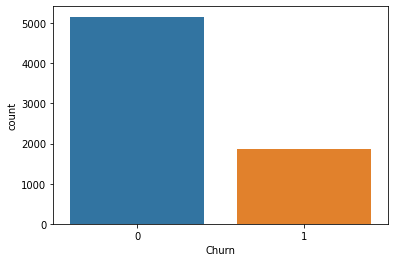

In [94]:
sns.countplot(x="Churn",data=df)
plt.show()

In [97]:
from imblearn import under_sampling, over_sampling

X = df.drop(['Churn'],axis=1)
y = df['Churn']

# Oversampling with smote
X_over_smote, y_over_smote = over_sampling.SMOTE().fit_resample(X, y)

#Spliting Data

Split the data set as train and test with 20:80 ratio.

In [99]:
#Split data into Train and Test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_over_smote, y_over_smote, test_size=0.2,random_state =1)

#Apply Machine Learning Algorithms

Let's start to apply some machine learning algorithms and find the accuracy of each.

#1. KNN Classification

We assume K = 3 for first iteration, but actually we don't know what is the optimal K value that gives maximum accuracy. So we can write a for loop that iterates for example 25 times and gives the accuracy at each iteartion. So that we can find the optimal K value.

In [100]:
# %%KNN Classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) #set K neighbor as 3
knn.fit(x_train,y_train)
predicted_y = knn.predict(x_test)
print("KNN accuracy according to K=3 is :",knn.score(x_test,y_test))

KNN accuracy according to K=3 is : 0.7909002904162633


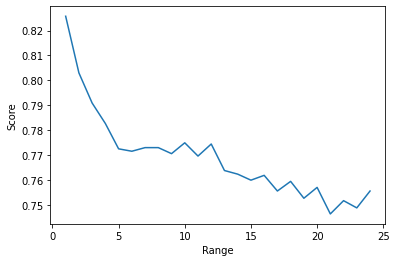

In [101]:
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) #set K neighbor as 3
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
    
plt.plot(range(1,25),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see above, if we use K = 1, then we get maximum score of 86%

In [102]:
knn_model = KNeighborsClassifier(n_neighbors = 1) #set K neighbor as 11
knn_model.fit(x_train,y_train)
predicted_y = knn_model.predict(x_test)
accuracy_knn = knn_model.score(x_test,y_test)
print("KNN accuracy according to K=11 is :",accuracy_knn)

KNN accuracy according to K=11 is : 0.8257502420135527


#2. SVM(Support Vector Machine) Classification

In [103]:
# %%SVM Classification
from sklearn.svm import SVC
svc_model = SVC(random_state = 1)
svc_model.fit(x_train,y_train)
accuracy_svc = svc_model.score(x_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.7197483059051307


#3. Logistic Regression Classification

In [104]:
# %%Logistic regression classification
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)
accuracy_lr = lr_model.score(x_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.7633107454017425


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#4. Decision Tree Classification

In [105]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
accuracy_dt = dt_model.score(x_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7938044530493708


#5. Random Forest Classification

In [106]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators = 5, random_state = 1)
rf_model_initial.fit(x_train,y_train)
print("Random Forest accuracy for 5 trees is :",rf_model_initial.score(x_test,y_test))

Random Forest accuracy for 5 trees is : 0.8330106485963213


I set tree number as 5 initially. But I want to find the appropriate tree number.

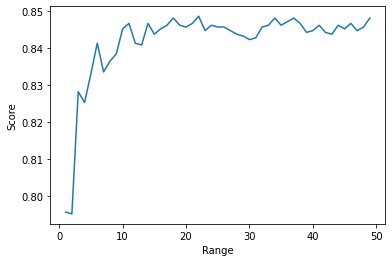

In [107]:
score_array = []
for each in range(1,50):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) #set K neighbor as 3
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
    
plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

As you can see, the highest accuracy is at n_estimators = 45.

In [108]:
rf_model = RandomForestClassifier(n_estimators = 33, random_state = 1) #set tree number as 33
rf_model.fit(x_train,y_train)
accuracy_rf = rf_model.score(x_test,y_test)
print("Random Forest accuracy for 33 trees is :",accuracy_rf)

Random Forest accuracy for 33 trees is : 0.846079380445305


#6. Naive Bayes Classification



In [109]:
#Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)
accuracy_nb = nb_model.score(x_test,y_test)
print("Naive Bayes accuracy is :",accuracy_nb)

Naive Bayes accuracy is : 0.7429816069699903


#Evaluation

In [110]:
def model_evaluation(model,name):
    
    confusion_matrix = pd.crosstab(y_test, model, rownames=['Actual'], colnames=['Predicted'], margins = True)
    sns.heatmap(confusion_matrix, square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('Prediction label')
    plt.ylabel('True Label');
    plt.title(name)
    plt.yticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.xticks([0.5,1.5], [ 'NO', 'YES'],va='center')
    plt.show()

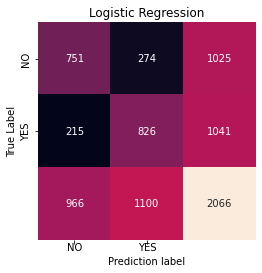

In [111]:
lr_y_pred = lr_model.predict(x_test)
model_evaluation(lr_y_pred,"Logistic Regression")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


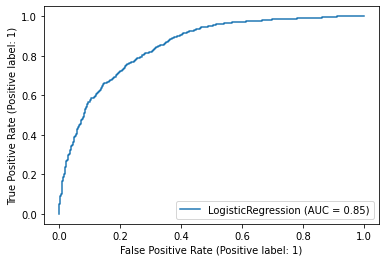

In [114]:
plot_roc_curve(lr_model,x_test,y_test)
plt.show()

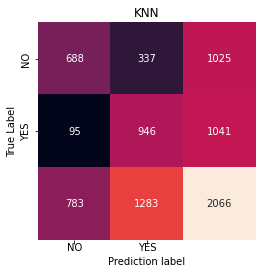

In [115]:
knn_model =  knn.predict(x_test)
model_evaluation(knn_model,"KNN")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


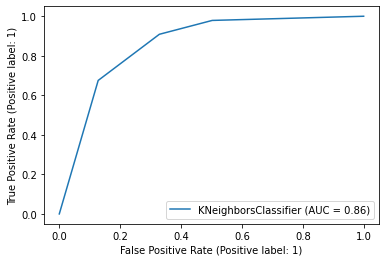

In [117]:
plot_roc_curve(knn,x_test,y_test)
plt.show()

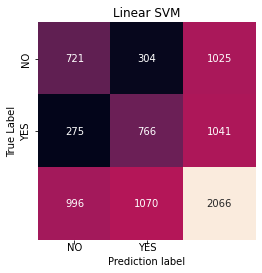

In [118]:
model_evaluation(svc_model.predict(x_test),"Linear SVM")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


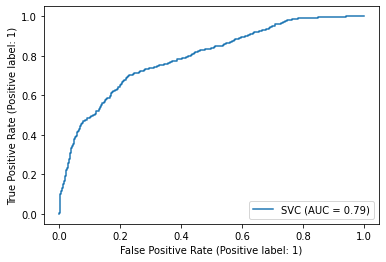

In [119]:
plot_roc_curve(svc_model,x_test,y_test)
plt.show()

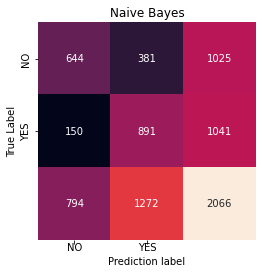

In [120]:
model_evaluation(nb_model.predict(x_test),"Naive Bayes")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


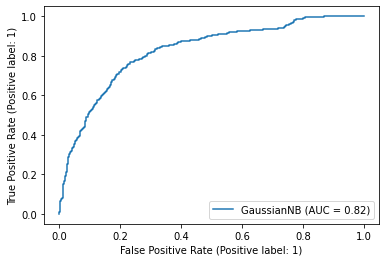

In [121]:
plot_roc_curve(nb_model,x_test,y_test)
plt.show()

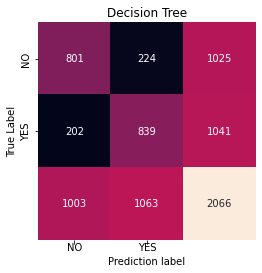

In [122]:
model_evaluation(dt_model.predict(x_test),"Decision Tree")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


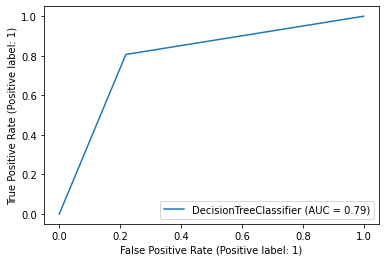

In [123]:
plot_roc_curve(dt_model,x_test,y_test)
plt.show()

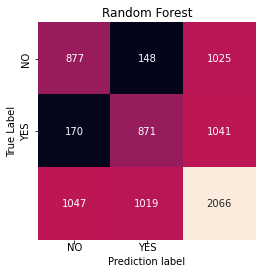

In [124]:
model_evaluation(rf_model.predict(x_test),"Random Forest")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


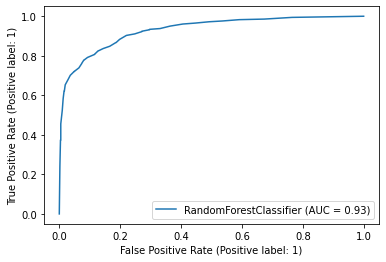

In [125]:
plot_roc_curve(rf_model,x_test,y_test)
plt.show()

In [126]:
# the function that prints all scores
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [127]:
print_scores("========Logistic Regression=========;",y_test, lr_model.predict(x_test))
print('========================')
print_scores("=========SVC=========;",y_test, svc_model.predict(x_test))
print('========================')
print_scores("=========Naive Bayes=========;",y_test, nb_model.predict(x_test))
print('========================')
print_scores("=========Decision Tree=========;",y_test, dt_model.predict(x_test))
print('========================')
print_scores("=========Random Forest=========;",y_test, rf_model.predict(x_test))
print_scores("=========KNN=========;",y_test, knn.predict(x_test))
print('========================')

========Logistic Regression=========;
accuracy:  0.7633107454017425
precision:  0.7509090909090909
recall:  0.7934678194044188
f1_score:  0.7630650461184433
=========SVC=========;
accuracy:  0.7197483059051307
precision:  0.7158878504672898
recall:  0.7358309317963496
f1_score:  0.7196625815530366
=========Naive Bayes=========;
accuracy:  0.7429816069699903
precision:  0.7004716981132075
recall:  0.8559077809798271
f1_score:  0.7394961092320778
=========Decision Tree=========;
accuracy:  0.7938044530493708
precision:  0.7892756349952963
recall:  0.8059558117195005
f1_score:  0.7937640539323394
=========Random Forest=========;
accuracy:  0.846079380445305
precision:  0.8547595682041217
recall:  0.8366954851104706
f1_score:  0.8460746203706665
=========KNN=========;
accuracy:  0.7909002904162633
precision:  0.7373343725643025
recall:  0.9087415946205571
f1_score:  0.7877931995684607


#What's the Conclusion?

1. Since data set is imbalanced, we prefered to use F1 score rather than accuracy.
2. Random Forest gives the highest F1 Score, so it is the best model.
3. Naive Bayesis the worst model because it gives the lowest F1 score.
4. People having month-to-month contract tend to churn more than people having long term conracts.
5. As the tenure increases, the probability of churn decreases.
6. As tmonthly charges increases, the probability of churn increases